<a href="https://colab.research.google.com/github/ebernardino01/DataAnalystPortfolio/blob/main/Olist/Olist_Data_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olist Data Analysis Notebook

## Installing and importing libraries

In [1]:
# Install geopandas and dependencies
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 25.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 1.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Reading the data from source

In [2]:
# Set no limit on column display
pd.set_option('display.max_columns', None)

In [3]:
# Load customers dataset
df_customers = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1K8S3d4ghfwTUnHnFNtfwzPSlbOCAYmBX'
)
print(df_customers.shape)
df_customers.info()

(99441, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
# Load geolocation dataset
df_location = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1Dvp32qN3L5vQ37RQ4AnP2vxEJIN6o56k'
)
print(df_location.shape)
df_location.info()

(1000163, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [5]:
# Load order items dataset
df_items = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=17R4g7Pw6iDbN8MtGVbqEm1s-EwjFQHfH'
)
print(df_items.shape)
df_items.info()

(112650, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [6]:
# Load order payments dataset
df_payments = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1oHTHEbSs0kI7IXFmyrJirBS5q7Dtvzid'
)
print(df_payments.shape)
df_payments.info()

(103886, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [7]:
# Load order reviews dataset
df_reviews = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1MUWnT3gDWlKbqfZTlJQHbJtEVrWy7A2k'
)
print(df_reviews.shape)
df_reviews.info()

(99224, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [8]:
# Load orders dataset
df_orders = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1bK1h1zK5kb_cLPelX3YX_GhMd_WWjEH6'
)
print(df_orders.shape)
df_orders.info()

(99441, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
# Load products dataset
df_products = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1UOo3BIFoOhSrsXRPXIU5ei8331_6XyiH'
)
print(df_products.shape)
df_products.info()

(32951, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [10]:
# Load sellers dataset
df_sellers = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1HHk9jU7oTznJNuS1nEecZamHOY-t4wly'
)
print(df_sellers.shape)
df_sellers.info()

(3095, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [11]:
# Load translations dataset
df_trans = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1zsNS-XwZLWs_eczy1CKLLysl4HB0TFQl'
)
print(df_trans.shape)
df_trans.info()

(71, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Cleaning and transforming the raw dataset

In [12]:
# Transform the column values in the customers dataset
df_customers['customer_city'] = df_customers['customer_city'].str.title()
df_customers = df_customers.rename(
    columns={
        'customer_zip_code_prefix': 'zip_code_prefix'
    }
)
df_customers.head()

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [13]:
# Check for duplicate rows in the location dataset
df_location[df_location.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [14]:
# Remove the duplicates
df_location.drop_duplicates(inplace=True)
print(df_location.shape)

(738332, 5)


In [15]:
# Transform the column values in the geolocation dataset
df_location['geolocation_city'] = df_location['geolocation_city'].str.title()
df_location = df_location.rename(
    columns={
        'geolocation_zip_code_prefix': 'zip_code_prefix'
    }
)
df_location.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao Paulo,SP
1,1046,-23.546081,-46.644820,Sao Paulo,SP
2,1046,-23.546129,-46.642951,Sao Paulo,SP
3,1041,-23.544392,-46.639499,Sao Paulo,SP
4,1035,-23.541578,-46.641607,Sao Paulo,SP


In [16]:
# Determine outliers from the geolocation latitude
df_location['geolocation_lat'].describe()

count    738332.000000
mean        -20.998353
std           5.892315
min         -36.605374
25%         -23.603061
50%         -22.873588
75%         -19.923336
max          45.065933
Name: geolocation_lat, dtype: float64

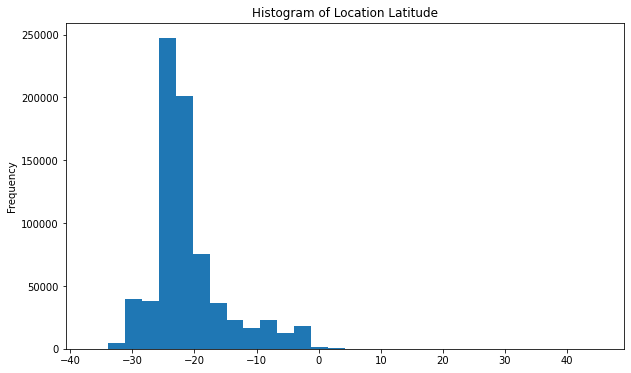

In [17]:
# Plot a histogram to visualize latitude distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax = df_location['geolocation_lat'].plot(kind='hist', bins=30)
ax.set_title('Histogram of Location Latitude')
plt.show()

In [18]:
# Filter values outside of three sigma
min_range = df_location['geolocation_lat'].mean() - \
    (3 * df_location['geolocation_lat'].std())
max_range = df_location['geolocation_lat'].mean() + \
    (3 * df_location['geolocation_lat'].std())
print(min_range, max_range)
df_location = df_location[
    (df_location['geolocation_lat'] >= min_range) &
    (df_location['geolocation_lat'] <= max_range)
]
df_location['geolocation_lat'].describe()

-38.67529710903493 -3.3214096783634552


count    725088.000000
mean        -21.349806
std           5.328018
min         -36.605374
25%         -23.608894
50%         -22.888725
75%         -19.968186
max          -3.321772
Name: geolocation_lat, dtype: float64

In [19]:
# Determine outliers from the geolocation longitude
df_location['geolocation_lng'].describe()

count    725088.000000
mean        -46.403747
std           4.333015
min         -72.930746
25%         -48.838142
50%         -46.642442
75%         -43.782804
max         -32.402779
Name: geolocation_lng, dtype: float64

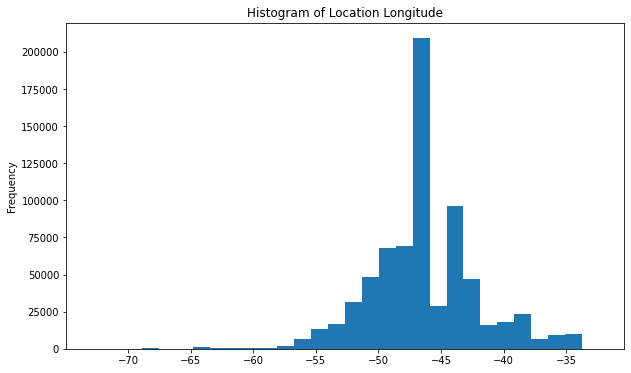

In [20]:
# Plot a histogram to visualize longitude distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax = df_location['geolocation_lng'].plot(kind='hist', bins=30)
ax.set_title('Histogram of Location Longitude')
plt.show()

In [21]:
# Filter values outside of three sigma
min_range = df_location['geolocation_lng'].mean() - \
    (3 * df_location['geolocation_lng'].std())
max_range = df_location['geolocation_lng'].mean() + \
    (3 * df_location['geolocation_lng'].std())
print(min_range, max_range)
df_location = df_location[
    (df_location['geolocation_lng'] >= min_range) &
    (df_location['geolocation_lng'] <= max_range)
]
df_location['geolocation_lng'].describe()

-59.402793759154605 -33.404700840793524


count    721130.000000
mean        -46.305978
std           4.131153
min         -59.367531
25%         -48.766718
50%         -46.639018
75%         -43.766088
max         -34.793685
Name: geolocation_lng, dtype: float64

In [22]:
# Quickly inspect the location dataset after removing the outliers
df_location.shape

(721130, 5)

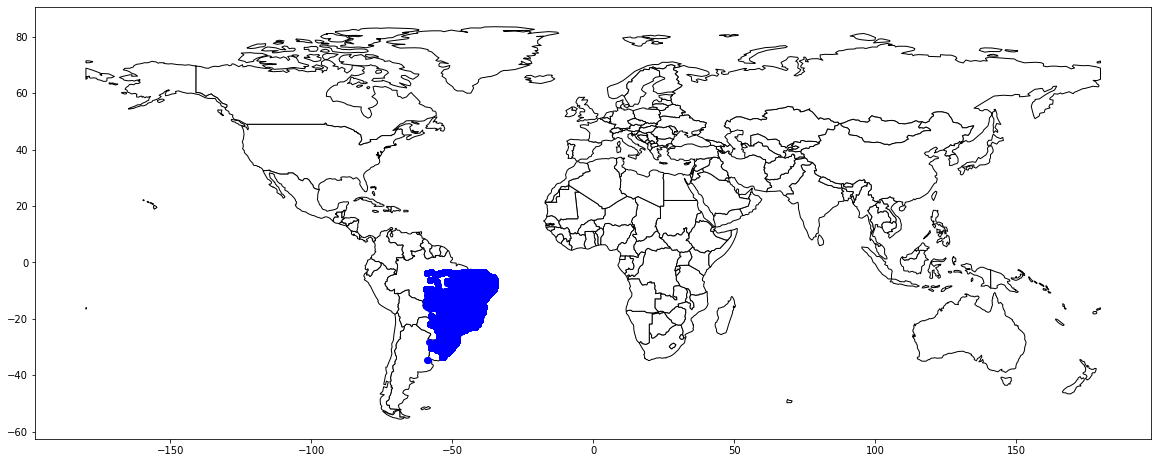

In [23]:
# Plot the geolocation coordinates
gdf = gpd.GeoDataFrame(
    df_location,
    geometry=gpd.points_from_xy(
        df_location['geolocation_lng'],
        df_location['geolocation_lat']
    )
)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world['continent'] != 'Antarctica'].plot(
    figsize=(20, 20),
    color='white',
    edgecolor='black'
)

gdf.plot(ax=ax, color='blue')
plt.show()

In [24]:
# Convert order item dates into datetime type
df_items['shipping_limit_date'] = pd.to_datetime(
    df_items['shipping_limit_date']
)
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
# Transform the column values in the payments dataset
df_payments['payment_type'] = df_payments['payment_type'].str.title()
df_payments['payment_type'].replace(
    '_', ' ', regex=True, inplace=True
)
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit Card,2,128.45


In [26]:
# Transform the column values in the orders dataset
df_orders['order_status'] = df_orders['order_status'].str.title()
print(df_orders['order_status'].unique())

# Convert order dates into datetime type
df_orders['order_purchase_timestamp'] = pd.to_datetime(
    df_orders['order_purchase_timestamp']
)
df_orders['order_approved_at'] = pd.to_datetime(
    df_orders['order_approved_at']
)
df_orders['order_delivered_carrier_date'] = pd.to_datetime(
    df_orders['order_delivered_carrier_date']
)
df_orders['order_delivered_customer_date'] = pd.to_datetime(
    df_orders['order_delivered_customer_date']
)
df_orders['order_estimated_delivery_date'] = pd.to_datetime(
    df_orders['order_estimated_delivery_date']
)
df_orders.info()

['Delivered' 'Invoiced' 'Shipped' 'Processing' 'Unavailable' 'Canceled'
 'Created' 'Approved']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [27]:
# Transform the column values in the sellers dataset
df_sellers['seller_city'] = df_sellers['seller_city'].str.title()
df_sellers = df_sellers.rename(
    columns={
        'seller_zip_code_prefix': 'zip_code_prefix'
    }
)
df_sellers.head()

,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [28]:
# Transform the English values in the translations dataset
df_trans['product_category_name_english'] = \
    df_trans['product_category_name_english'].str.title()
df_trans['product_category_name_english'].replace(
    '_', ' ', regex=True, inplace=True
)

# Merge the translations with the products using the English category name
df_prod_trans = pd.merge(
    df_products[['product_id', 'product_category_name']],
    df_trans[['product_category_name', 'product_category_name_english']],
    on=['product_category_name'],
    how='inner'
)
df_prod_trans.drop(['product_category_name'], axis=1, inplace=True)
df_prod_trans = df_prod_trans.rename(
    columns={
        'product_category_name_english': 'product_category_name'
    }
)
df_prod_trans.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,Perfumery
2,0d009643171aee696f4733340bc2fdd0,Perfumery
3,b1eae565a61935e0011ee7682fef9dc9,Perfumery
4,8da90b37f0fb171b4877c124f965b1f6,Perfumery


In [29]:
# Merge the orders, order items, customers, sellers, payment and
# product datasets
df_ord_item = pd.merge(
    df_orders,
    df_items,
    on=['order_id'],
    how='left'
)
df_ord_item_cust = pd.merge(
    df_ord_item,
    df_customers,
    on=['customer_id'],
    how='left'
)
df_ord_item_cust_sell = pd.merge(
    df_ord_item_cust,
    df_sellers,
    on=['seller_id'],
    how='left'
)
df_ord_item_cust_sell_pay = pd.merge(
    df_ord_item_cust_sell,
    df_payments,
    on=['order_id'],
    how='left'
)
df_ord_item_cust_sell_pay_prod = pd.merge(
    df_ord_item_cust_sell_pay,
    df_prod_trans,
    on=['product_id'],
    how='left'
)

# Rename columns
df_ord_item_cust_sell_pay_prod = df_ord_item_cust_sell_pay_prod.rename(
    columns={
        'zip_code_prefix_x': 'customer_zip_code_prefix',
        'zip_code_prefix_y': 'seller_zip_code_prefix'
    }
)
df_ord_item_cust_sell_pay_prod

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,9350.0,Maua,SP,1.0,Credit Card,1.0,18.12,Housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,9350.0,Maua,SP,3.0,Voucher,1.0,2.00,Housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,Delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,Sao Paulo,SP,9350.0,Maua,SP,2.0,Voucher,1.0,18.59,Housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,Delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,Barreiras,BA,31570.0,Belo Horizonte,SP,1.0,Boleto,1.0,141.46,Perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,Delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,Vianopolis,GO,14840.0,Guariba,SP,1.0,Credit Card,3.0,179.12,Auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,Delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,Praia Grande,SP,17602.0,Tupa,SP,1.0,Credit Card,3.0,195.00,Baby
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,Delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,Nova Vicosa,BA,8290.0,Sao Paulo,SP,1.0,Credit Card,5.0,271.01,Home Appliances 2
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,Japuiba,RJ,37175.0,Ilicinea,MG,1.0,Credit Card,4.0,441.16,Computers Accessories
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,Delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,Japuiba,RJ,37175.0,Ilicinea,MG,1.0,Credit Card,4.0,441.16,Computers Accessories
